In [355]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
# %matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, ShuffleSplit, RandomizedSearchCV, train_test_split, StratifiedKFold 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score
from sklearn.neighbors import KNeighborsClassifier  # knn
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm


from datetime import datetime, date, time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve, average_precision_score,classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer,KNNImputer
from scipy.stats import norm
from scipy import stats

In [217]:
df=pd.read_csv('E:/data/data science/data course/DATASET/winequalityN.csv')


In [218]:
df.shape

(6497, 13)

In [219]:
df = df.drop_duplicates(keep='first').reset_index(drop=True)

In [220]:
df.shape

(5329, 13)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5329 non-null   object 
 1   fixed acidity         5319 non-null   float64
 2   volatile acidity      5321 non-null   float64
 3   citric acid           5326 non-null   float64
 4   residual sugar        5327 non-null   float64
 5   chlorides             5327 non-null   float64
 6   free sulfur dioxide   5329 non-null   float64
 7   total sulfur dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5320 non-null   float64
 10  sulphates             5325 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 541.4+ KB


In [222]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            6.2              0.32         0.16             7.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.045                 30.0                 136.0   0.9949  3.18   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.47      9.6        6

In [223]:
df.tail()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
5324  red            6.8             0.620         0.08             1.9   
5325  red            6.2             0.600         0.08             2.0   
5326  red            5.9             0.550         0.10             2.2   
5327  red            5.9             0.645         0.12             2.0   
5328  red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
5324      0.068                 28.0                  38.0  0.99651  3.42   
5325      0.090                 32.0                  44.0  0.99490  3.45   
5326      0.062                 39.0                  51.0  0.99512  3.52   
5327      0.075                 32.0                  44.0  0.99547  3.57   
5328      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
5324       0.82      9.5        6  
5325       0.58     10.5        5  
5326        NaN     11.2        6  
5327       0.71     10.2        5  
5328       0.66     11.0        6

In [224]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5319.000000       5321.000000  5326.000000     5327.000000   
mean        7.216573          0.344123     0.318738        5.053839   
std         1.319194          0.168228     0.147116        4.504005   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5327.000000          5329.000000           5329.000000  5329.000000   
mean      0.056668            30.060143            114.189341     0.994536   
std       0.036845            17.815588             56.781422     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             75.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994640   
75%       0.066000            41.000000            154.000000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  5320.000000  5325.000000  5329.000000  5329.000000  
mean      3.224434     0.533268    10.548539     5.796022  
std       0.160275     0.149724     1.186134     0.879922  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.400000     6.000000  
75%       3.330000     0.600000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [225]:
print("\n\nRows     : ", df.shape[0])
print("\nColumns  : ", df.shape[1])
print("\nFeatures : \n", df.columns.tolist())
print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n", df.nunique())




Rows     :  5329

Columns  :  13

Features : 
 ['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Missing values :   38

Unique values :  
 type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64


In [226]:
df['type']=df['type'].apply(lambda x : 1 if x == 'white' else 2 )
print('unique type:', df['type'].nunique())

unique type: 2


In [227]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [228]:
imputer=KNNImputer()
df=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [229]:
df['quality level'] = df['quality'].apply( lambda x: 'Low' if x <= 4 else 'Medium' if  x <= 6 else 'High' )
print('unique quality level:', df['quality level'].nunique())

unique quality level: 3


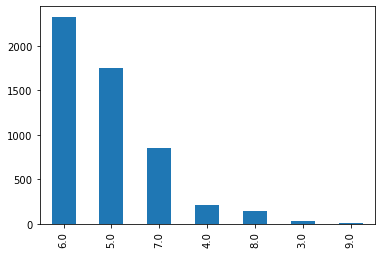

In [230]:
df['quality'].value_counts().plot(kind='bar');


In [231]:
df.groupby(['type','quality'])['quality'].count()

type  quality
1.0   3.0          20
      4.0         153
      5.0        1178
      6.0        1792
      7.0         690
      8.0         132
      9.0           5
2.0   3.0          10
      4.0          53
      5.0         577
      6.0         535
      7.0         167
      8.0          17
Name: quality, dtype: int64

E:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


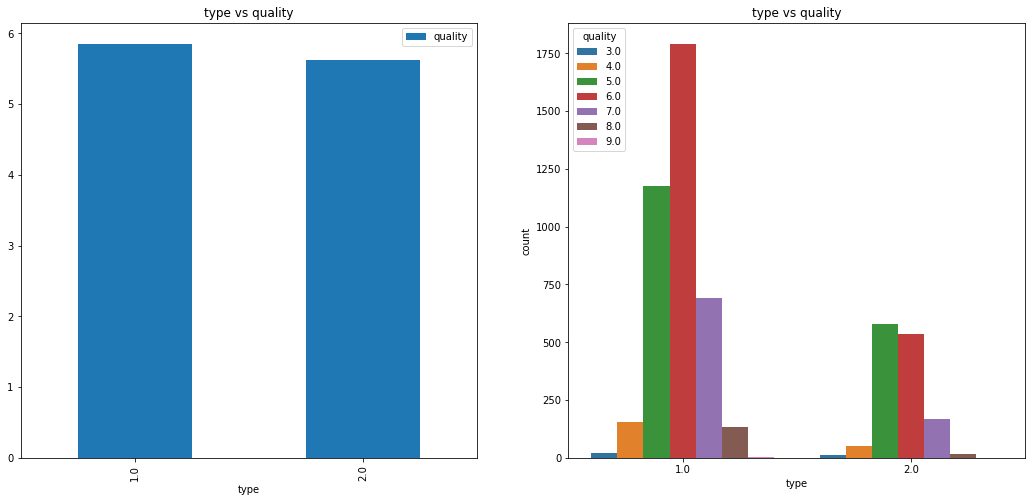

In [232]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['type','quality']].groupby(['type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('type vs quality')
sns.countplot('type',hue='quality',data=df,ax=ax[1])
ax[1].set_title('type vs quality')
plt.show()

In [233]:
corrlation = df.corr()
corrlation['quality'].sort_values(axis=0, ascending=False)


quality                 1.000000
alcohol                 0.469555
citric acid             0.098693
free sulfur dioxide     0.054456
sulphates               0.041493
pH                      0.040490
total sulfur dioxide   -0.050387
residual sugar         -0.056918
fixed acidity          -0.080727
type                   -0.114889
chlorides              -0.202087
volatile acidity       -0.264115
density                -0.326978
Name: quality, dtype: float64

In [234]:
corrlation['type'].sort_values(axis=0, ascending=False)


type                    1.000000
volatile acidity        0.644508
chlorides               0.499691
sulphates               0.489784
fixed acidity           0.486732
density                 0.428757
pH                      0.310582
alcohol                -0.057334
quality                -0.114889
citric acid            -0.183899
residual sugar         -0.328968
free sulfur dioxide    -0.465295
total sulfur dioxide   -0.694181
Name: type, dtype: float64

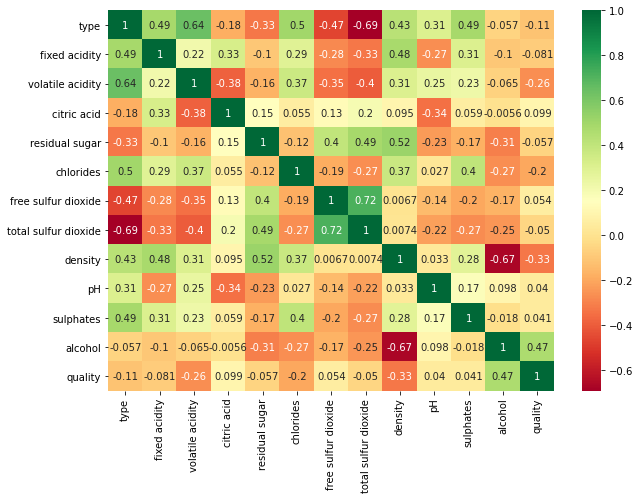

In [235]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),annot=True, cmap='RdYlGn');


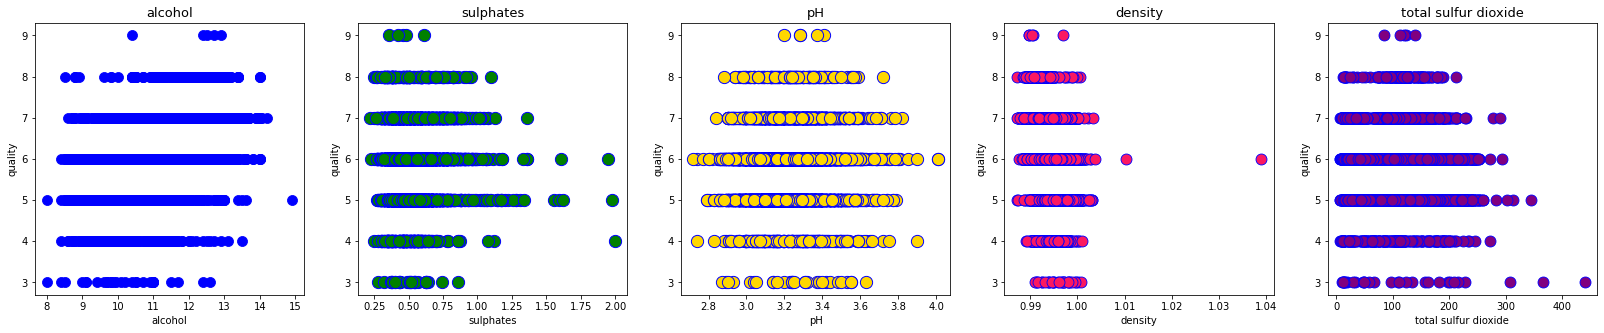

In [236]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(28,5))

sns.scatterplot(x=df['alcohol'], y=df['quality'], ax=ax1, color='blue',edgecolor = 'b', s=100, marker='o');
ax1.set_title('alcohol', fontsize=13)

sns.scatterplot(x=df['sulphates'], y=df['quality'], ax=ax2, color='green',edgecolor = 'b', s=150, marker='o');
ax2.set_title('sulphates', fontsize=13)

sns.scatterplot(x=df['pH'], y=df['quality'], ax=ax3, color='gold',edgecolor = 'b', s =150, marker='o');
ax3.set_title('pH', fontsize=13)

sns.scatterplot(x=df['density'], y=df['quality'], ax=ax4, color='#FB1861',edgecolor = 'b', s=120, marker='o');
ax4.set_title('density', fontsize=13)

sns.scatterplot(x=df['total sulfur dioxide'], y=df['quality'] , ax=ax5, color='purple', edgecolor='b', s=120, marker='o');
ax5.set_title('total sulfur dioxide', fontsize=13)

plt.show()

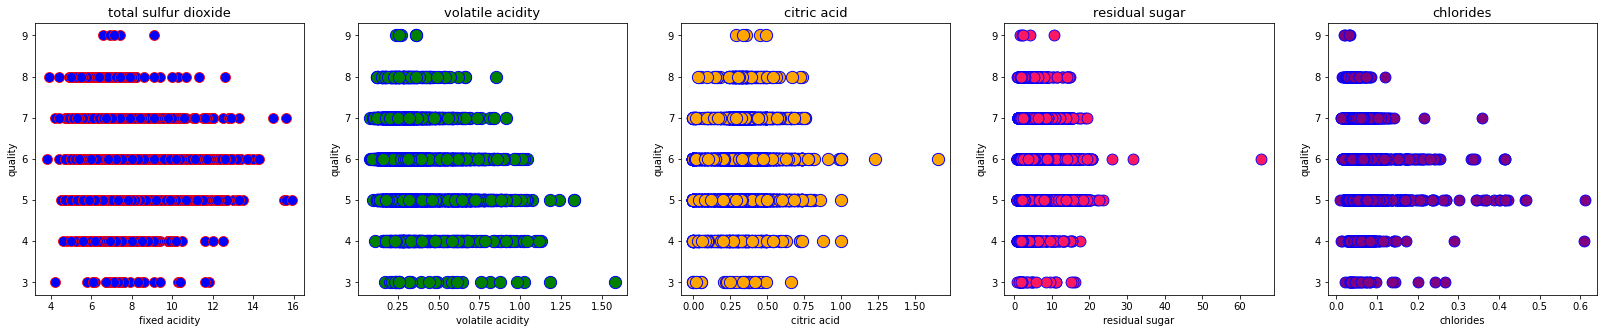

In [237]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(28,5))

sns.scatterplot(x=df['fixed acidity'], y=df['quality'], ax=ax1, color='blue', edgecolor = 'r', s=100, marker='o');
ax1.set_title('total sulfur dioxide', fontsize=13)

sns.scatterplot(x=df['volatile acidity'], y=df['quality'], ax=ax2, color='green', edgecolor = 'b', s=150, marker='o');
ax2.set_title('volatile acidity', fontsize=13)

sns.scatterplot(x=df['citric acid'], y=df['quality'], ax=ax3, color='orange', edgecolor = 'b', s=150, marker='o');
ax3.set_title('citric acid', fontsize=13)

sns.scatterplot(x=df['residual sugar'], y=df['quality'], ax=ax4, color='#FB1861', edgecolor = 'b', s=120, marker='o');
ax4.set_title('residual sugar', fontsize=13)

sns.scatterplot(x=df['chlorides'], y=df['quality'] , ax=ax5, color='purple', edgecolor = 'b', s=120, marker='o');
ax5.set_title('chlorides', fontsize=13)

plt.show()

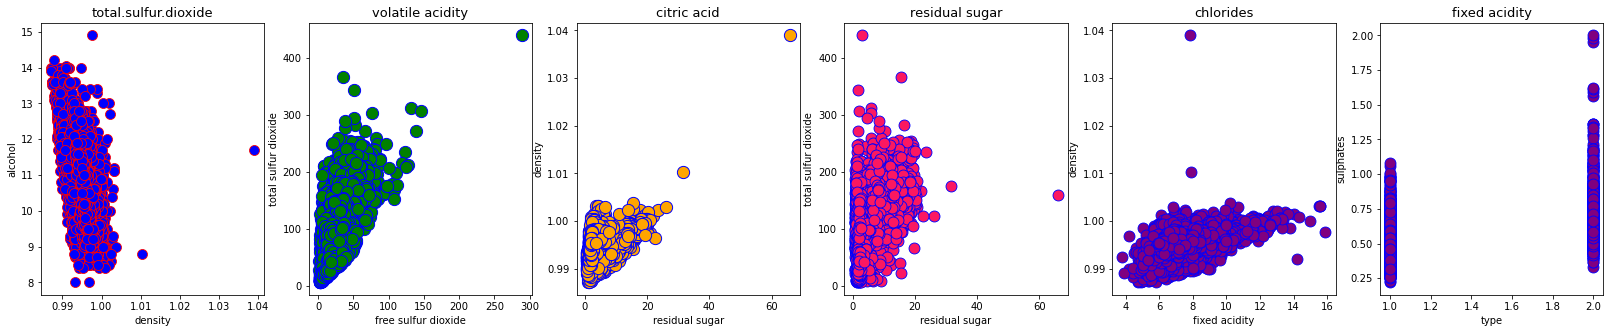

In [238]:
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(28,5))

sns.scatterplot(x=df['density'], y=df['alcohol'], ax=ax1, color='blue', edgecolor = 'r', s=100, marker='o');
ax1.set_title('total.sulfur.dioxide', fontsize=13)

sns.scatterplot(x=df['free sulfur dioxide'], y=df['total sulfur dioxide'], ax=ax2, color='green', edgecolor = 'b', s=150, marker='o');
ax2.set_title('volatile acidity', fontsize=13)

sns.scatterplot(x=df['residual sugar'], y=df['density'], ax=ax3, color='orange', edgecolor = 'b', s=150, marker='o');
ax3.set_title('citric acid', fontsize=13)

sns.scatterplot(x=df['residual sugar'], y=df['total sulfur dioxide'], ax=ax4, color='#FB1861', edgecolor = 'b', s=120, marker='o');
ax4.set_title('residual sugar', fontsize=13)

sns.scatterplot(x=df['fixed acidity'], y=df['density'] , ax=ax5, color='purple', edgecolor = 'b', s=120, marker='o');
ax5.set_title('chlorides', fontsize=13)

sns.scatterplot(x=df['type'], y=df['sulphates'] , ax=ax6, color='purple', edgecolor = 'b', s=120, marker='o');
ax6.set_title('fixed acidity', fontsize=13)

plt.show()

In [239]:
# df.to_csv('E:/data/data science/data course/DATASET/winequality.csv')

In [240]:
# df= pd.read_csv('E:/data/data science/data course/DATASET/winequalityF.csv')

In [241]:
df.loc[df['total sulfur dioxide']>300 ,'quality' ]

277     5.0
1207    3.0
1630    3.0
1779    5.0
2202    5.0
3836    3.0
Name: quality, dtype: float64

In [242]:
np.where(df['density']>1.01)

(array([1402, 2302], dtype=int64),)

In [243]:
np.where(df['sulphates']>1.75)

(array([4050, 4055, 4105], dtype=int64),)

In [244]:
df.loc[(df['citric acid']>1.5) ,:]

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
634   1.0            7.4               0.2         1.66             2.1   

     chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
634      0.022                 34.0                 113.0  0.99165  3.26   

     sulphates  alcohol  quality quality level  
634       0.55     12.2      6.0        Medium

In [245]:
df.loc[(df['chlorides']>0.5) ,:]



type  fixed acidity  volatile acidity  citric acid  residual sugar  \
4105   2.0            9.2              0.52         1.00             3.4   
4196   2.0            7.7              0.41         0.76             1.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
4105      0.610                 32.0                  69.0   0.9996  2.74   
4196      0.611                  8.0                  45.0   0.9968  3.06   

      sulphates  alcohol  quality quality level  
4105       2.00      9.4      4.0           Low  
4196       1.26      9.4      5.0        Medium

In [246]:
df.loc[(df['free sulfur dioxide']>100) & (df['quality']<5)]


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
556    1.0            6.8             0.290         0.16            1.40   
1432   1.0            6.7             0.250         0.26            1.55   
1630   1.0            7.1             0.490         0.22            2.00   
2516   1.0            6.2             0.255         0.24            1.70   
2718   1.0            9.4             0.240         0.29            8.50   
3836   1.0            6.1             0.260         0.25            2.90   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
556       0.038                122.5                 234.5  0.99220  3.15   
1432      0.041                118.5                 216.0  0.99490  3.55   
1630      0.047                146.5                 307.5  0.99240  3.24   
2516      0.039                138.5                 272.0  0.99452  3.53   
2718      0.037                124.0                 208.0  0.99395  2.90   
3836      0.047                289.0                 440.0  0.99314  3.44   

      sulphates  alcohol  quality quality level  
556        0.47     10.0      4.0           Low  
1432       0.63      9.4      3.0           Low  
1630       0.37     11.0      3.0           Low  
2516       0.53      9.6      4.0           Low  
2718       0.38     11.0      3.0           Low  
3836       0.64     10.5      3.0           Low

In [247]:

df.loc[(df['volatile acidity']>1.5) & (df['quality']<5)]

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
5076   2.0            7.6              1.58          0.0             2.1   

      chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
5076      0.137                  5.0                   9.0  0.99476  3.5   

      sulphates  alcohol  quality quality level  
5076        0.4     10.9      3.0           Low

In [248]:
df=df.drop([277, 1207, 1630, 3836, 2202, 1779, 1402,
            2302, 661, 696, 702, 740, 1362,2303, 3837, 4106, 
            4196,4050, 4055, 4105,5076,556,1432,2516,2718,634,4196] , axis=0).reset_index(drop=True)

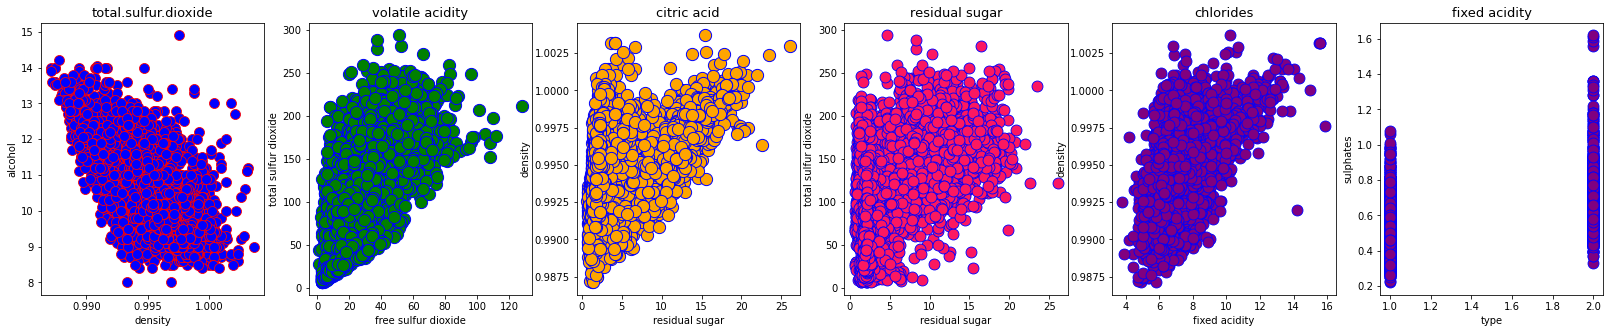

In [249]:
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(28,5))

sns.scatterplot(x=df['density'], y=df['alcohol'], ax=ax1, color='blue', edgecolor = 'r', s=100, marker='o');
ax1.set_title('total.sulfur.dioxide', fontsize=13)

sns.scatterplot(x=df['free sulfur dioxide'], y=df['total sulfur dioxide'], ax=ax2, color='green', edgecolor = 'b', s=150, marker='o');
ax2.set_title('volatile acidity', fontsize=13)

sns.scatterplot(x=df['residual sugar'], y=df['density'], ax=ax3, color='orange', edgecolor = 'b', s=150, marker='o');
ax3.set_title('citric acid', fontsize=13)

sns.scatterplot(x=df['residual sugar'], y=df['total sulfur dioxide'], ax=ax4, color='#FB1861', edgecolor = 'b', s=120, marker='o');
ax4.set_title('residual sugar', fontsize=13)

sns.scatterplot(x=df['fixed acidity'], y=df['density'] , ax=ax5, color='purple', edgecolor = 'b', s=120, marker='o');
ax5.set_title('chlorides', fontsize=13)

sns.scatterplot(x=df['type'], y=df['sulphates'] , ax=ax6, color='purple', edgecolor = 'b', s=120, marker='o');
ax6.set_title('fixed acidity', fontsize=13)

plt.show()

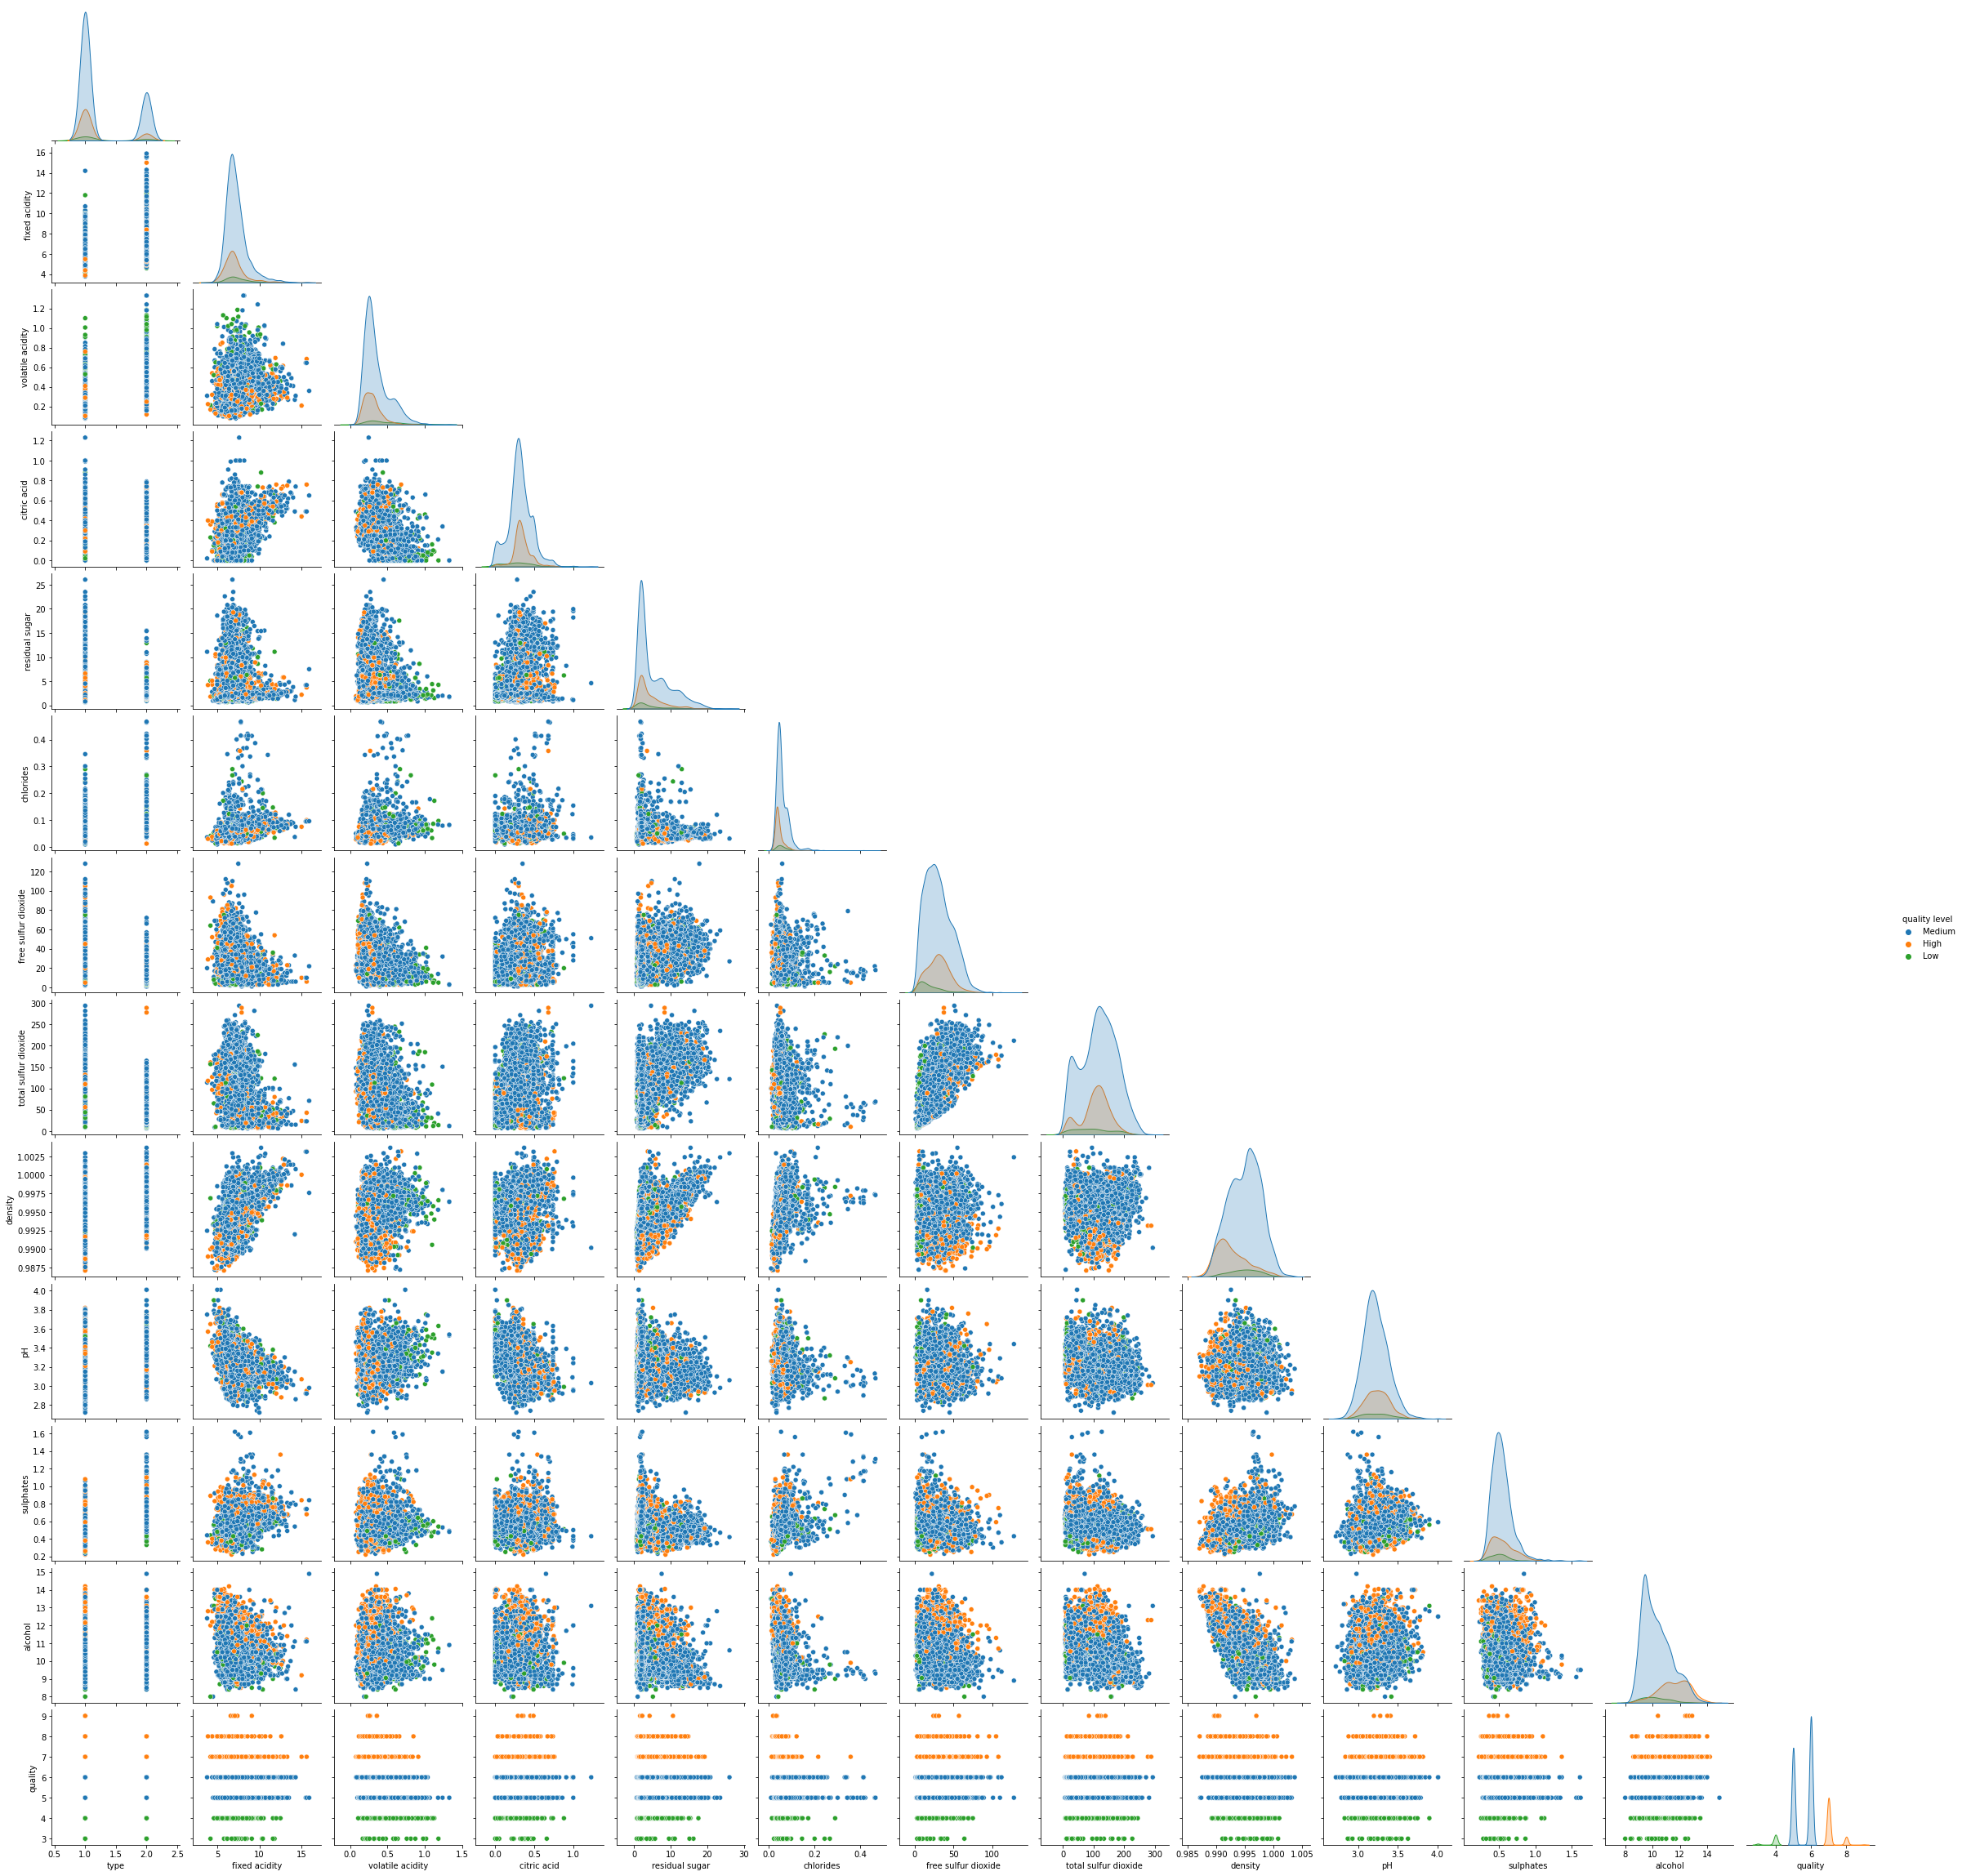

In [194]:
sns.pairplot(data = df, hue='quality level',corner=True)

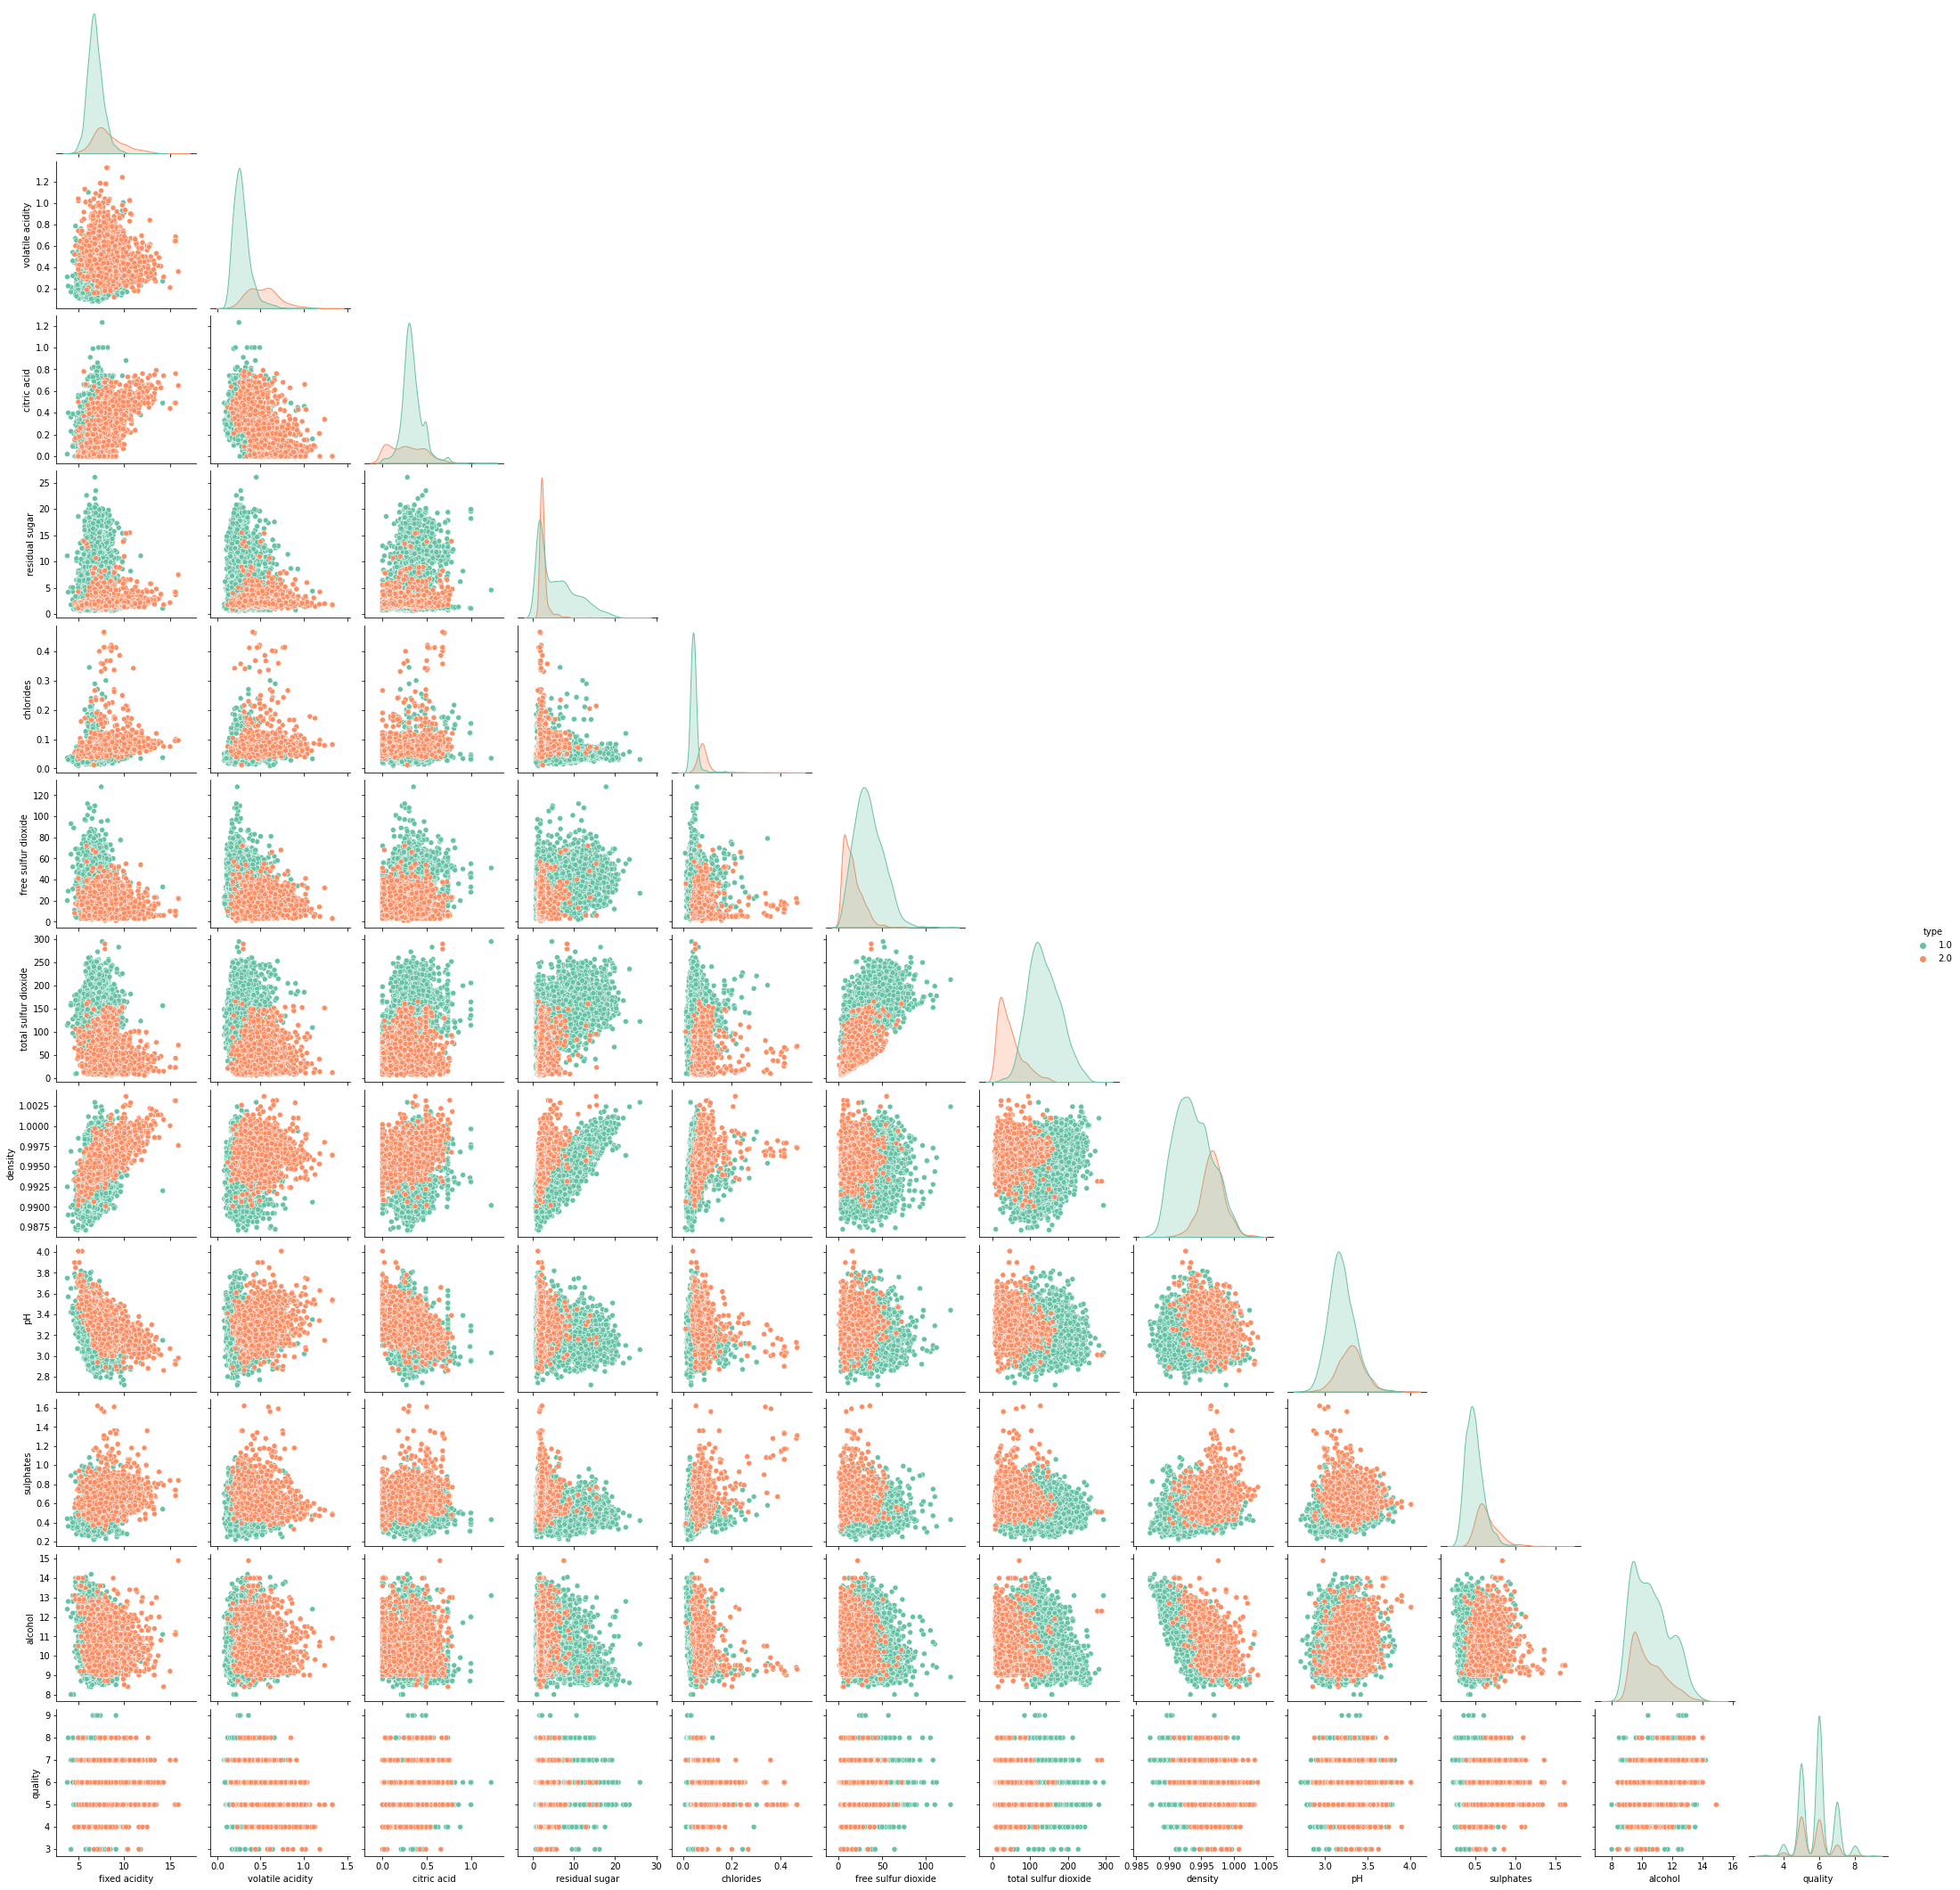

In [216]:
sns.pairplot(data = df, hue='type', palette='Set2', corner=True);

E:\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


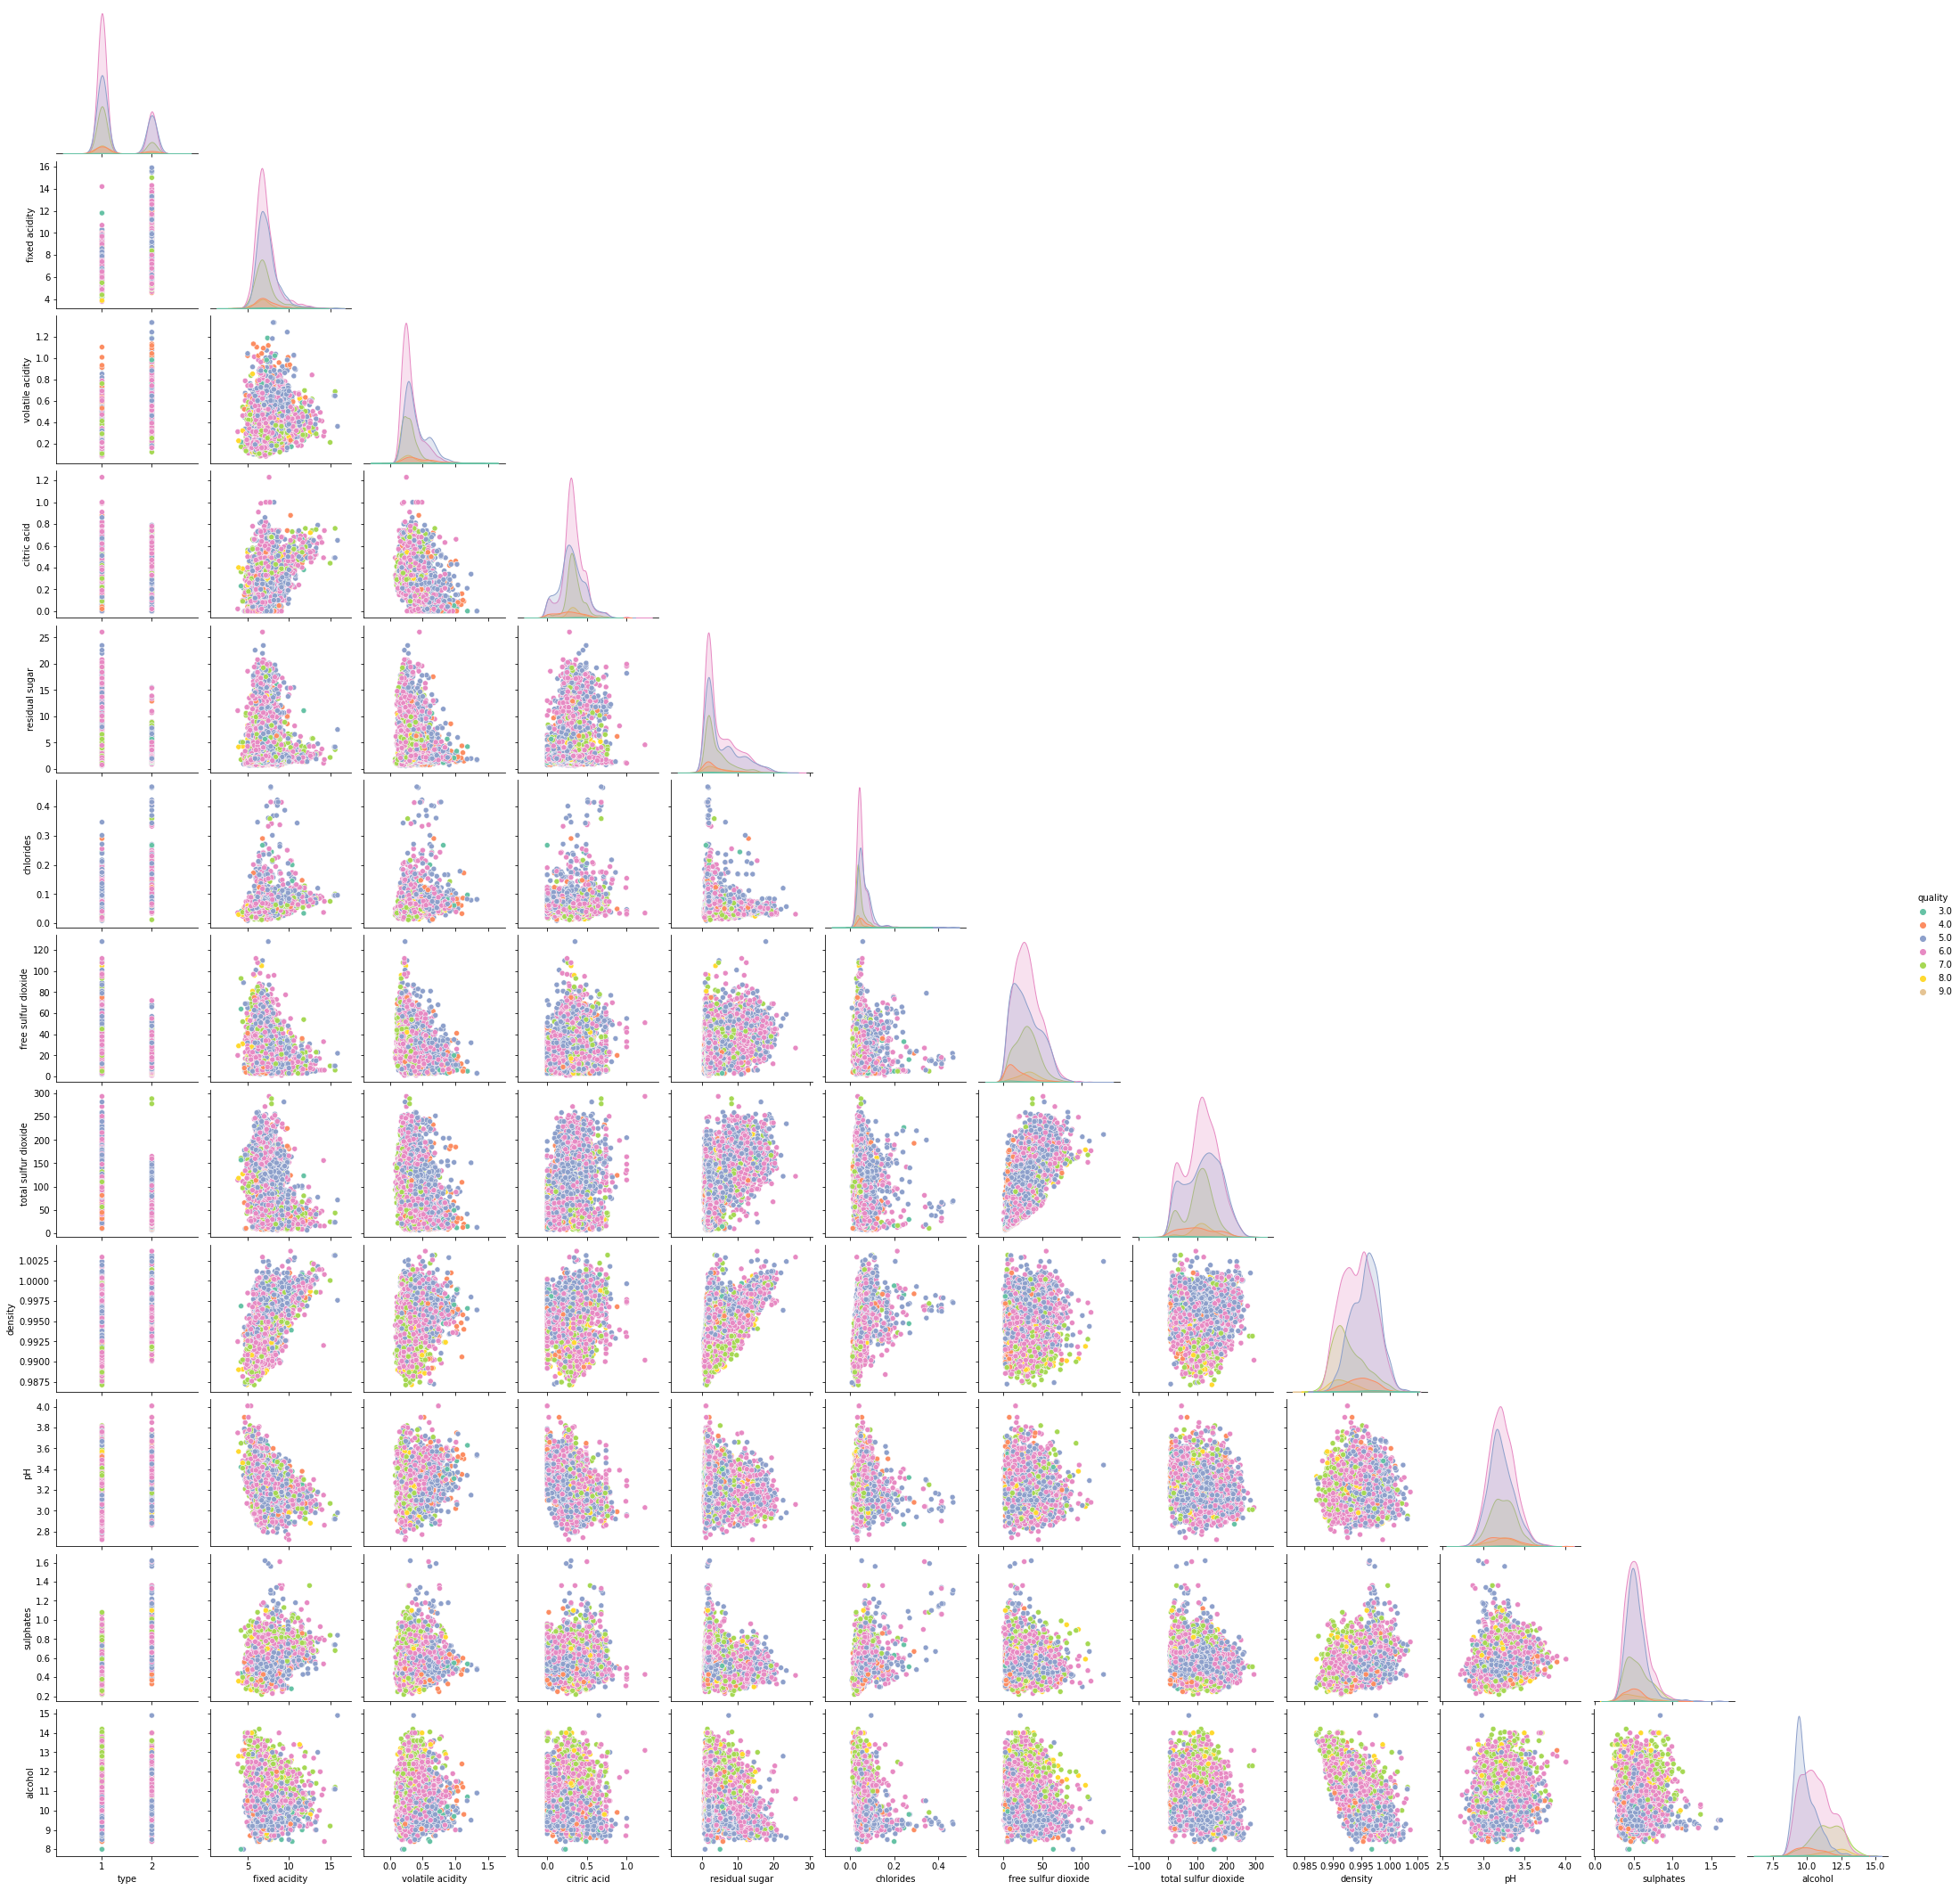

In [215]:
sns.pairplot(data = df, hue='quality', palette='Set2', corner=True);

## Wine Type Classifier Models

In [250]:
df = df.drop(['total sulfur dioxide'], axis=1)

In [313]:
scale = StandardScaler()

In [462]:
X = df.drop(['type', 'quality level'], axis=1)

In [464]:
y = df['type']

In [465]:
X = scale.fit_transform(X)

In [466]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=True)

In [467]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3712, 11) (3712,)
(1591, 11) (1591,)


In [468]:
print("mean guality in train: {0:.2f}".format(np.mean(y_train)))
print('mean Quality in test: {0:.2f}'.format(np.mean(y_test)))

mean guality in train: 1.26
mean Quality in test: 1.25


In [469]:
from sklearn.decomposition import PCA


In [470]:
from sklearn.dummy import DummyClassifier

model_dum = DummyClassifier(strategy='most_frequent')
model_dum.fit(X_train, y_train)
print('score for baseline model: {0:.2f}'.format(model_dum.score(X_test, y_test)))


score for baseline model: 0.75


In [497]:
algos = {
            'linear_regression': {
                    'model': LogisticRegression(),
                    'params': {
                            'max_iter': [20, 30, 50, 75,100],
                            'multi_class': ['multinomial'],
                            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                            'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
                            }
                    },
            'knn': {
                    'model': KNeighborsClassifier(),
                    'params': {
                            'n_neighbors': [5, 10, 20, 25],
                            'p': [2, 3, 5],
                            'weights': ['uniform', 'distance'],
                            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
                            }
                    },
            'decision_tree': {
                    'model': DecisionTreeClassifier(),
                    'params': {
                            'criterion': ['gini', 'entropy'],
                            'splitter': ['best', 'random'],
                            'max_depth': [4, 8, 9, 10],
                            'min_samples_split': [2, 5, 8, 11],
                            'max_features': ['auto', 'sqrt', 'log2'],
                            'ccp_alpha': [0, 0.05, 0.1]
                            }
                    },
            'random_forest': {
                    'model': RandomForestClassifier(),
                    'params': {
                            'n_estimators': [100, 300, 500, 600],
                            'criterion': ['gini', 'entropy'],
                            'max_depth': [9, 12, 15, 18],
                            'max_features': ['auto', 'sqrt', 'log2'],
                            'class_weight': ['balanced', 'balanced_subsample']
                            }
                    },
            }    

   

In [ ]:
scores = []

cv = StratifiedKFold(n_splits=5, random_state=0)
for algo_name, config in algos.items():
    gs = RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X_train, y_train)
    scores.append({
          'model': algo_name,
          'best_score': gs.best_score_,
          'best_params': gs.best_params_
                  })

In [499]:
scores

[{'model': 'linear_regression',
  'best_score': 0.9884155079030521,
  'best_params': {'solver': 'saga',
   'penalty': 'l1',
   'multi_class': 'multinomial',
   'max_iter': 75}},
 {'model': 'knn',
  'best_score': 0.9843741950931062,
  'best_params': {'weights': 'uniform',
   'p': 2,
   'n_neighbors': 10,
   'algorithm': 'brute'}},
 {'model': 'decision_tree',
  'best_score': 0.9361512481271743,
  'best_params': {'splitter': 'random',
   'min_samples_split': 8,
   'max_features': 'sqrt',
   'max_depth': 9,
   'criterion': 'entropy',
   'ccp_alpha': 0}},
 {'model': 'random_forest',
  'best_score': 0.9862606247709984,
  'best_params': {'n_estimators': 600,
   'max_features': 'sqrt',
   'max_depth': 18,
   'criterion': 'gini',
   'class_weight': 'balanced_subsample'}}]

In [500]:
result = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
result

model  best_score  \
0  linear_regression    0.988416   
1                knn    0.984374   
2      decision_tree    0.936151   
3      random_forest    0.986261   

                                         best_params  
0  {'solver': 'saga', 'penalty': 'l1', 'multi_cla...  
1  {'weights': 'uniform', 'p': 2, 'n_neighbors': ...  
2  {'splitter': 'random', 'min_samples_split': 8,...  
3  {'n_estimators': 600, 'max_features': 'sqrt', ...

In [435]:
lr = KNeighborsClassifier()

In [436]:
lr.fit(X_train, y_train)

KNeighborsClassifier()

In [437]:
lr.score(X_test, y_test)

0.9849151477058454

In [427]:
pca = PCA()
blackbox_model = Pipeline([('pca', pca), ('lr', lr)])
blackbox_model.fit(X_train, y_train)
blackbox_model.score(X_test, y_test)


0.9849151477058454

## Wine quality level Classifier Models

In [542]:
X = df.drop(['quality level'], axis=1)

In [503]:
y = df['quality level'].apply(lambda x: 1 if x=='Low' else 2 if x=='Medium' else 3)

In [543]:
X = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

In [531]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4242, 12) (4242,)
(1061, 12) (1061,)


In [532]:
print("mean guality in train: {0:.2f}".format(np.mean(y_train)))
print('mean Quality in test: {0:.2f}'.format(np.mean(y_test)))

mean guality in train: 2.15
mean Quality in test: 2.13


In [533]:
from sklearn.dummy import DummyClassifier

model_dum = DummyClassifier(strategy='most_frequent')
model_dum.fit(X_train, y_train)
print('score for baseline model: {0:.2f}'.format(model_dum.score(X_test, y_test)))


score for baseline model: 0.78


In [544]:
algos = {
            'Logistic_regression': {
                    'model': LogisticRegression(),
                    'params': {
                            'max_iter': [20, 50, 75, 80, 85, 100],
                            'multi_class': ['multinomial'],
                            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                            'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                            'l1_ratio': [0, 1]
                            }
                    },
            'knn': {
                    'model': KNeighborsClassifier(),
                    'params': {
                            'n_neighbors': [5, 10, 20, 25],
                            'p': [2, 3, 5],
                            'weights': ['uniform', 'distance'],
                            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
                            }
                    },
            'decision_tree': {
                    'model': DecisionTreeClassifier(),
                    'params': {
                            'criterion': ['gini', 'entropy'],
                            'splitter': ['best', 'random'],
                            'max_depth': [4, 8, 9, 10],
                            'min_samples_split': [2, 5, 8, 11],
                            'max_features': ['auto', 'sqrt', 'log2'],
                            'ccp_alpha': [0, 0.05, 0.1]
                            }
                    },
            'random_forest': {
                    'model': RandomForestClassifier(),
                    'params': {
                            'n_estimators': [100, 300, 500, 600],
                            'criterion': ['gini', 'entropy'],
                            'max_depth': [9, 12, 15, 18],
                            'max_features': ['auto', 'sqrt', 'log2'],
                            'class_weight': ['balanced', 'balanced_subsample']
                            }
                    },
            }    

   

In [547]:
scores = []

cv = StratifiedKFold(n_splits=5, random_state=0)
for algo_name, config in algos.items():
    gs = RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X_train, y_train)
    scores.append({
          'model': algo_name,
          'best_score': gs.best_score_,
          'best_params': gs.best_params_
                  })
     

E:\New folder\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\New folder\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penal

In [548]:
result = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
result

model  best_score  \
0  Logistic_regression    1.000000   
1                  knn    0.964877   
2        decision_tree    0.956388   
3        random_forest    1.000000   

                                         best_params  
0  {'solver': 'sag', 'penalty': 'none', 'multi_cl...  
1  {'weights': 'distance', 'p': 5, 'n_neighbors':...  
2  {'splitter': 'best', 'min_samples_split': 11, ...  
3  {'n_estimators': 500, 'max_features': 'auto', ...

In [549]:
scores

[{'model': 'Logistic_regression',
  'best_score': 1.0,
  'best_params': {'solver': 'sag',
   'penalty': 'none',
   'multi_class': 'multinomial',
   'max_iter': 100,
   'l1_ratio': 0}},
 {'model': 'knn',
  'best_score': 0.9648765473253773,
  'best_params': {'weights': 'distance',
   'p': 5,
   'n_neighbors': 5,
   'algorithm': 'auto'}},
 {'model': 'decision_tree',
  'best_score': 0.9563884814543192,
  'best_params': {'splitter': 'best',
   'min_samples_split': 11,
   'max_features': 'auto',
   'max_depth': 10,
   'criterion': 'entropy',
   'ccp_alpha': 0}},
 {'model': 'random_forest',
  'best_score': 1.0,
  'best_params': {'n_estimators': 500,
   'max_features': 'auto',
   'max_depth': 12,
   'criterion': 'entropy',
   'class_weight': 'balanced'}}]